# Project - Data Viz and Storytelling

--- 
## The Senario:
Suppose you are an analytics consultant and your client is the Senate of Berlin, looking to draft policy suggestions to help make rent more accessible in the city. 

While they have not (yet) asked you for a recommendation, they need to understand the market's current state.

For that, you are asked:

1. Is there a shortage of *affordable* appartments in Berlin as a whole, or is the issue concentrated in select neighbourhoods? (hint: you will need to define "affordable" based on some criteria)

1. A few companies are exploring *Apartment renovation* as a viable business model — what impact could this practice have in the availability of *affordable* apartments?

>Build a story around the dataset.


--- 
## The dataset:

This is a list of rental appartments in Berlin. One row is for one appartment. The dataset contains 6 columns. 
- Region: is the Berlin district, where the flat is located
- Condition: is the condition of the flat
- Rooms: The number of rooms the flat has
- Rent: Monthly rent for the flat
- Year_Construction: The year in which the house was build
- Space: How many square meters does the flat has?



---

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the dataset
df = pd.read_csv('https://raw.githubusercontent.com/juliandnl/redi_ss20/master/berlin_rental.csv')
df.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space
0,Mitte,first_time_use,4.0,2659.00,2019,117.20
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33
2,Köpenick,well_kept,2.0,979.00,1997,83.61
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27


## Define all the terms in the question that seem ambiguous

Question 1:
- **shortage**: what we have compared to what we need
- **affordable**: what most berliners can pay per month

Question 2:
- **have an impact**: make a significant difference on the current situation

## Break down the question into smaller questions

Question 1:

- what rent can the berliners afford?
- how many affordable apartments do we need?
- how many affordable appartments do we have? 
- what % of the apartments are affordable in each region?

Question 2:

- how many apartments are not rented because they require rennovation?
- how many extra rooms would be put on the market if these apartments were rennovated?

## Build a few plots or other types of analyses to answer the questions


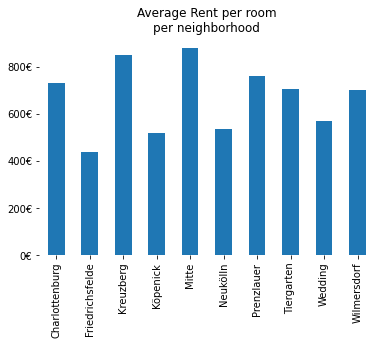

In [ ]:
df['rent_per_room']=df.Rent/df.Rooms

ax = df.groupby("Region")['rent_per_room'].mean().plot.bar()

# format y axis ticks labels
y_ticks = ax.get_yticks()
formatted_y_ticks = ['{:,.0f}€'.format(x) for x in y_ticks]
ax.set_yticklabels(formatted_y_ticks)

# hide x axis label
plt.xlabel("")

# set title
plt.title("Average Rent per room\nper neighborhood")

# hide frame
for position in ax.spines.keys():
  ax.spines[position].set_visible(False)

plt.show()

#What's affordable?
We can actually take into consideration many things:
* Minimum salary in Berlin 
* Taxes
* Salary should be 3 times the kaltmiete
etc.


#define the affordable flat based on the minimum salary of a person:
 min_salary_ per_hour : 9,60 euro
 40 hours per week :9.6 * 40 = 384
 salary_per_month = 384 * 4 = 1536
 salary_after_deduction_of_10%_tax : 1382 euro

 - then if we consider that the salary should be 3 times the kaltmiete, then we have : 1382/3 = 460 euro > which shows the affordable rent for the person who has the lowest income
 - so now we should look for in our dataset and see how what is the percentage of the flats with this amount of rent

In [ ]:
df['affordable'] = df.rent_per_room <= 460

affordable_or_not_by_region = df.groupby(["Region","affordable"])[['Condition']].count().reset_index()
affordable_or_not_by_region.rename(columns={"Condition":"apt_count"}, inplace=True)

affordable_or_not_by_region.head()

,Region,affordable,apt_count
0,Charlottenburg,False,69
1,Charlottenburg,True,10
2,Friedrichsfelde,False,18
3,Friedrichsfelde,True,34
4,Kreuzberg,False,45


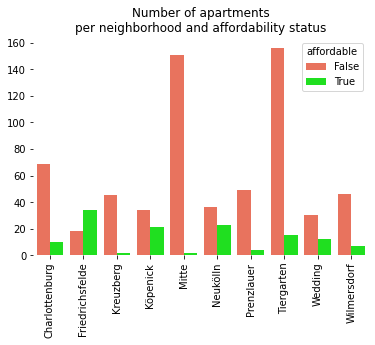

In [ ]:
ax = sns.barplot(data=affordable_or_not_by_region, x='Region', y='apt_count',
                 hue='affordable', palette=["tomato","#00FF00"])
plt.xticks(rotation=90)

# hide x axis label
plt.xlabel("")
plt.ylabel("")

#set title
plt.title("Number of apartments\nper neighborhood and affordability status")

# hide frame
for position in ax.spines.keys():
  ax.spines[position].set_visible(False)

plt.show()

In [ ]:

aff = affordable_or_not_by_region.query("affordable == True").copy()
aff.rename(columns={"apt_count":"aff_apt_count"}, inplace = True)
del aff['affordable']

not_aff = affordable_or_not_by_region.query("affordable == False").copy()
not_aff.rename(columns={"apt_count":"not_aff_apt_count"}, inplace = True)
del not_aff['affordable']

affordable_or_not_by_region_wide = pd.merge(aff,not_aff, on="Region", how = 'left')
affordable_or_not_by_region_wide['perc_aff'] = affordable_or_not_by_region_wide.aff_apt_count/affordable_or_not_by_region_wide.sum(axis=1)
affordable_or_not_by_region_wide.set_index("Region", inplace= True)

affordable_or_not_by_region_wide.head()

,aff_apt_count,not_aff_apt_count,perc_aff
Region,,,
Charlottenburg,10,69,0.126582
Friedrichsfelde,34,18,0.653846
Kreuzberg,2,45,0.042553
Köpenick,21,34,0.381818
Mitte,2,151,0.013072


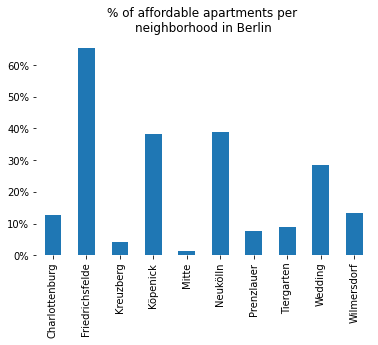

In [ ]:
ax = affordable_or_not_by_region_wide['perc_aff'].plot.bar()

y_ticks = ax.get_yticks()
formatted_y_ticks = ['{:,.0%}'.format(x) for x in y_ticks]
ax.set_yticklabels(formatted_y_ticks)

plt.xticks(rotation=90)

# hide x axis label
plt.xlabel("")
plt.ylabel("")

#set title
plt.title("% of affordable apartments per \nneighborhood in Berlin")

# hide frame
for position in ax.spines.keys():
  ax.spines[position].set_visible(False)

plt.show()

# Would renovating apartments make a difference?

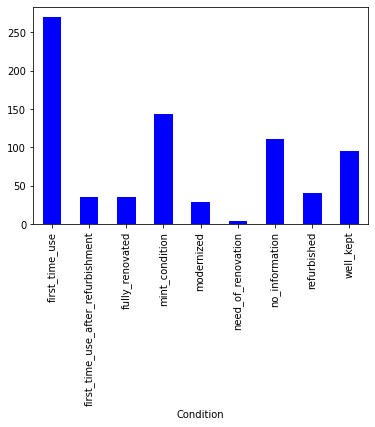

In [ ]:
renov_status = df.groupby("Condition")['Region'].count()

renov_status.plot.bar(color="blue")

##And now a basic example with Matplotlib

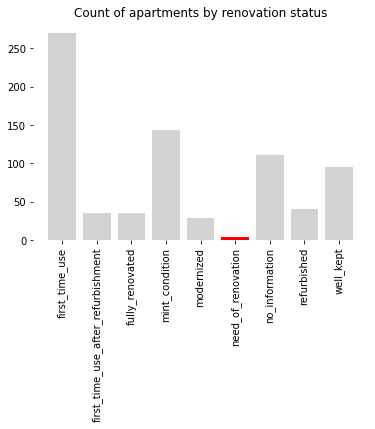

In [ ]:
# STEP 1: IMPORT THE PACKAGE
import matplotlib.pyplot as plt 

# STEP 2: CREATE A FIGURE WITH AXES
fig, ax = plt.subplots() 
# THE FIGURE IS LIKE AN IMAGE. YOU CAN THEN SAVE IT AS A PNG IMAGE FOR EG.
# THE AXES ARE THE PLOTS YOU WANT TO DRAW ON THE FIGURE. HERE WE CREATE ONLY 1.
# BECAUSE IT'S ONLY 1, WE CALL IT AX, AND NOT AXES

# In the examples before, i created plots either with seaborn or with
# the .plot() method of pandas, and i didn't have to create the axes before 
# providing the data.



# STEP 3: FILL THE AX WITH DATA

# Plot the count for every status
ax.bar(x=renov_status.index, height=renov_status, color="lightgrey")

# FUN TIP: 
# Plot the bar for apartments in need of renovation on top of the previous plot in red
# My audience cannot both listen to me and read a complex plot. Make my point
# completely obvious:
renov_status_need_renov = renov_status.loc[['need_of_renovation']]
ax.bar(x=renov_status_need_renov.index,height=renov_status_need_renov, color='red')


# STEP 4: MAKE MY PLOT EASY TO READ AND UNDERSTAND

# Set a title
plt.title("Count of apartments by renovation status")

# Less is more
# hide x and y axes labels because the title and the renovation statusses are explicit enough
plt.xlabel("")
plt.ylabel("")

# hide frame for a cleaner appearance
for position in ax.spines.keys():
  ax.spines[position].set_visible(False)

# rotate the x tick labels
plt.xticks(rotation=90)

plt.show()

# Now a figure with multiple plots in Matplotlib

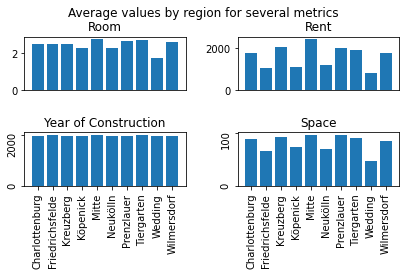

In [ ]:
# STEP 2: CREATE A FIGURE WITH AXES
fig, axes = plt.subplots(nrows=2,ncols=2) 
# This time we want 4 plots on our figure, so we'll have 4 axes


# STEP 3: FILL THE AXES WITH DATA

# Let's plot the mean of each numerical variable for each region

all_the_means = df.groupby("Region").mean()

# Plot avg number of rooms by region
axes[0,0].bar(x=all_the_means.index, height=all_the_means['Rooms'])
# We have 2 rows and 2 columns, so we index the row and the columns with [0,0]

# Plot avg rent by region
axes[0,1].bar(x=all_the_means.index, height=all_the_means['Rent'])

# Plot avg year of construction by region
axes[1,0].bar(x=all_the_means.index, height=all_the_means['Year_Construction'])

# Plot avg space by region
axes[1,1].bar(x=all_the_means.index, height=all_the_means['Space'])


# STEP 4: MAKE MY PLOT EASY TO READ AND UNDERSTAND

# Set a title for the whole figure
fig.suptitle("Average values by region for several metrics")

# Now it becomes tricky, cause we can't use the plt functions for before, they
# would be applied only to the last plot (2nd row, 2nd column). We need to go plot by plot:

# add titles
axes[0,0].title.set_text('Room')
axes[0,1].title.set_text('Rent')
axes[1,0].title.set_text('Year of Construction')
axes[1,1].title.set_text('Space')

# hide the x labels of the 1st row of plots
axes[0,0].xaxis.set_visible(False)
axes[0,1].xaxis.set_visible(False)

# rotate the x labels of the 2nd row of plots
axes[1,0].tick_params(labelrotation=90)
axes[1,1].tick_params(labelrotation=90)

# this one is here to add space between plots
fig.tight_layout(pad=2)

plt.show()

And now the same plot with more efficient code using a for loop:

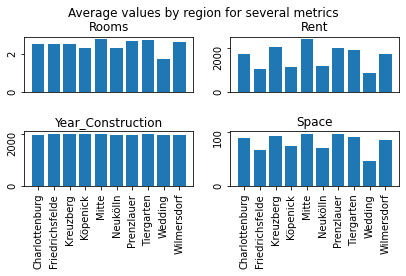

In [ ]:
# STEP 2: CREATE A FIGURE WITH AXES
fig, axes = plt.subplots(nrows=2,ncols=2) 

# STEP 3: FILL THE AXES WITH DATA

# Let's plot the mean of each numerical variable for each region

all_the_means = df.groupby("Region").mean()

metric_position = {"Rooms":(0,0),
                   "Rent":(0,1),
                   "Year_Construction":(1,0),
                   "Space":(1,1)}

for metric in metric_position.keys():

  i, j = metric_position[metric]

  # Plot avg number of the metric by region
  axes[i,j].bar(x=all_the_means.index, height=all_the_means[metric])

  # add titles
  axes[i,j].title.set_text(metric)

  # hide the x labels of the 1st row of plots
  if i == 0:
    axes[i,j].xaxis.set_visible(False)

  # rotate the x labels
  axes[i,j].tick_params(labelrotation=90)


# STEP 4: MAKE YOUR PLOT EASY TO READ AND UNDERSTAND

# Set a title for the whole figure
fig.suptitle("Average values by region for several metrics")

# this one is here to add space between plots
fig.tight_layout(pad=2)

plt.show()

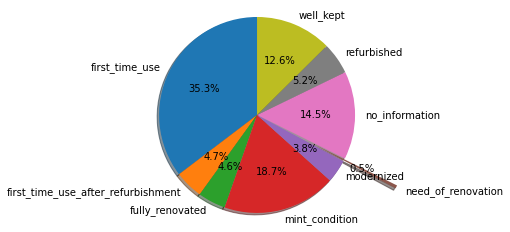

In [ ]:
# Pie chart:
labels = renov_status.index
sizes = renov_status
explode = (0, 0, 0, 0, 0, 0.6, 0, 0, 0)  # only "explode" the 6th slice (i.e. 'need_of_renovation')

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()